In [11]:
import matplotlib.pyplot as plt
import mglearn
import mglearn.datasets
import numpy as np



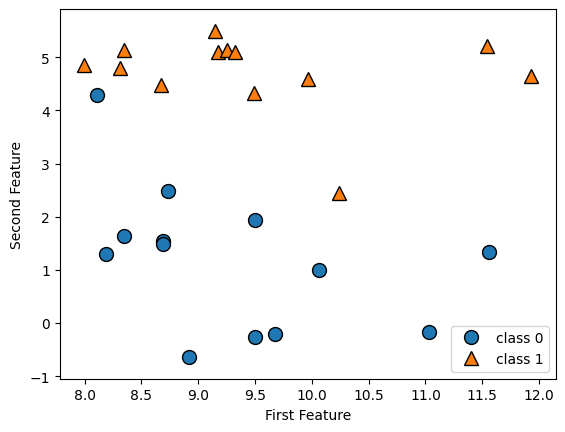

In [ ]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.show()


Text(0, 0.5, 'Target')

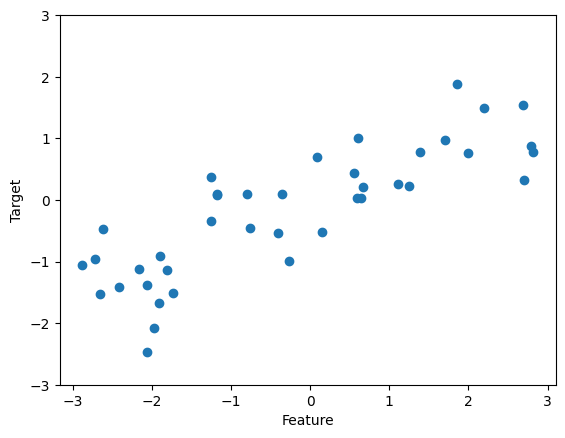

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("{}".format(cancer.keys()))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("shape of cancer data: {}".format(cancer.data.shape))

shape of cancer data: (569, 30)


In [12]:
print("sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [13]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Problem: boston housing dataset is to predict the median value of homes in several boiston neighborhoods in the 1970s
this dataset is taken out from Scikit due to an ethical issue.
We will look into Knn Algo:


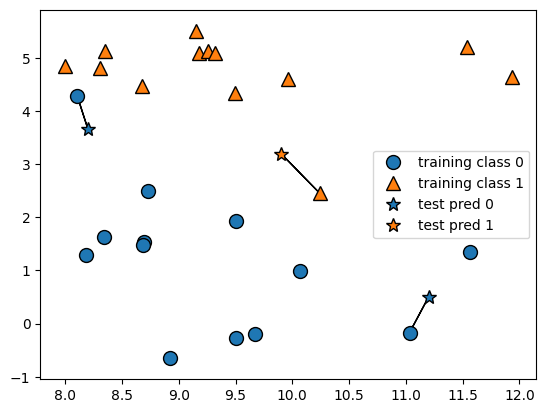

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

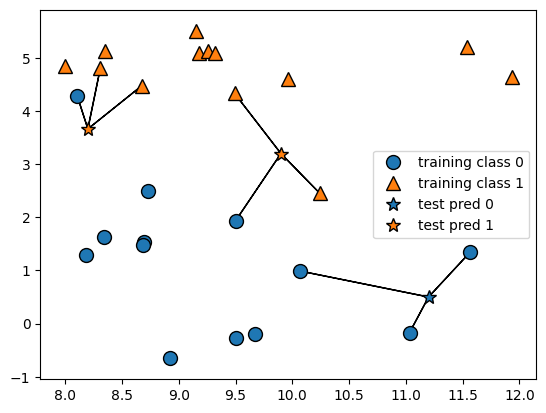

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [46]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_trian, X_test, y_train,y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_trian,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
print("Prediction of test Set \n{}".format(clf.predict(X_test)))

Prediction of test Set 
[1 0 1 0 1 0 0]


In [48]:
print("Test Accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test Accuracy: 0.86


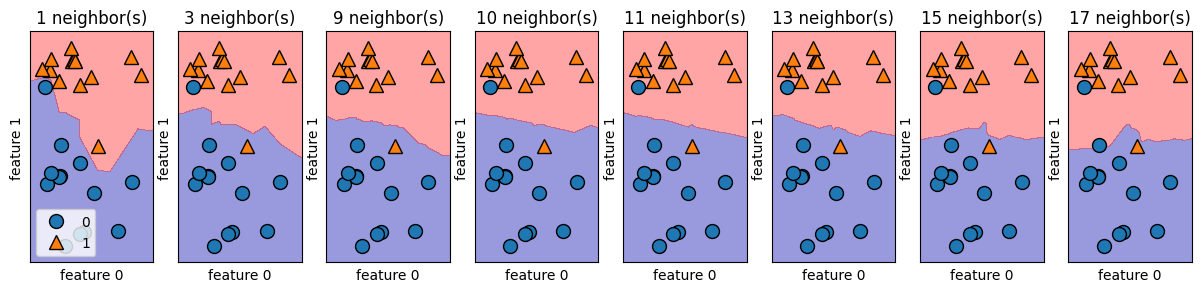

In [61]:
fig, axes = plt.subplots(1,8,figsize=(15,3))

for n_ne, ax in zip([1,3,9,10,11,13,15,17], axes):
    clf=KNeighborsClassifier(n_neighbors=n_ne).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_ne))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)





Optimum Neighbors are around 10-11 as we go above that the decision boundary again starts to change pattern from smooth to distorted around the test points
 We shall now perform a tasj for cancer dataset
 

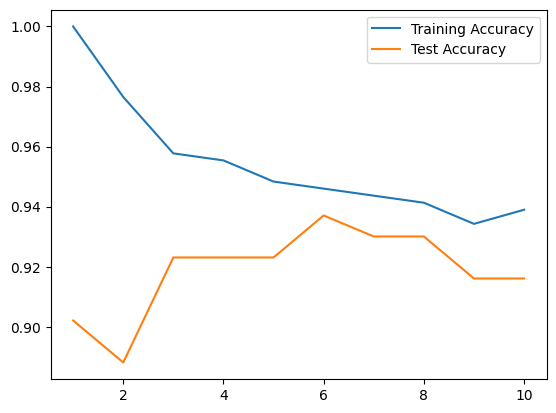

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target,random_state=66)
training_accuracy =[]
test_accuracy =[]
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #building the model
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="Training Accuracy")
plt.plot(neighbors_settings,test_accuracy,label="Test Accuracy")
plt.ylabel="Accuracy"
plt.xlabel="n_neighbors"
plt.legend()

TypeError: 'str' object is not callable

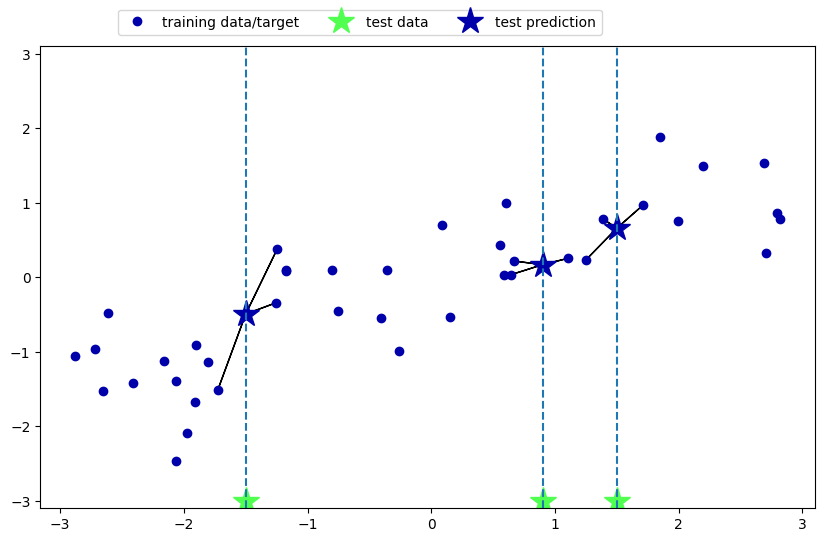

In [73]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [83]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [84]:
print("Prediction : {}".format(reg.predict(X_test)))
print(reg.score(X_test,y_test))


Prediction : [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


0.8344172446249606

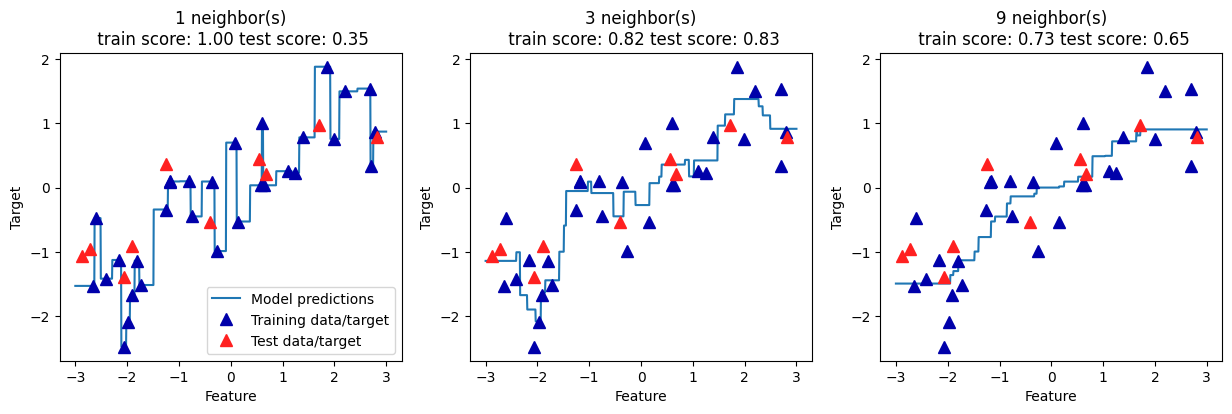

In [86]:
fig, axes =plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'^',c=mglearn.cm2(1),markersize=8)

    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"],loc="best")

w[0]: 0.393906  b: -0.031804


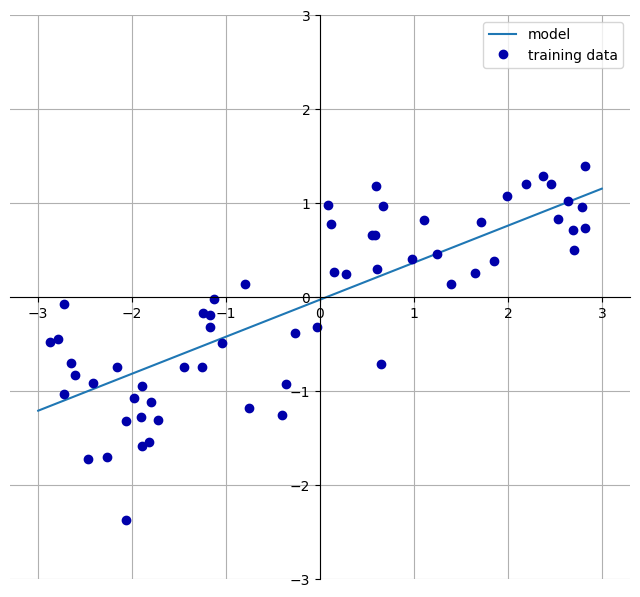

In [87]:
mglearn.plots.plot_linear_regression_wave()